## **Importación de librerías**

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from wordcloud.wordcloud import WordCloud
from collections import Counter

## **Cargar el archivo csv, ya con el proceso de ETL realizado**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_credits_limpio.csv', parse_dates=['release_date'])

## **Visualizar el dataset**

In [ ]:
df.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,vote_average,vote_count,id_collection,name_collection,poster_path_collection,backdrop_path_collection,return,release_year,cast,director
0,30000000,"('Animation', 'Comedy', 'Family')",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"('Pixar Animation Studios',)","('United States of America',)",1995-10-30,373554033.0,...,7.7,5415,10194,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,12.451801,1995,"('Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter
1,65000000,"('Adventure', 'Fantasy', 'Family')",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"('TriStar Pictures', 'Teitler Film', 'Intersco...","('United States of America',)",1995-12-15,262797249.0,...,6.9,2413,0,sin dato,sin dato,sin dato,4.043035,1995,"('Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston
2,0,"('Romance', 'Comedy')",15602,en,A family wedding reignites the ancient feud be...,11.712900,"('Warner Bros.', 'Lancaster Gate')","('United States of America',)",1995-12-22,0.0,...,6.5,92,119050,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,0.000000,1995,"('Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch
3,16000000,"('Comedy', 'Drama', 'Romance')",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,"('Twentieth Century Fox Film Corporation',)","('United States of America',)",1995-12-22,81452156.0,...,6.1,34,0,sin dato,sin dato,sin dato,5.090760,1995,"('Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker
4,0,"('Comedy',)",11862,en,Just when George Banks has recovered from his ...,8.387519,"('Sandollar Productions', 'Touchstone Pictures')","('United States of America',)",1995-02-10,76578911.0,...,5.7,173,96871,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,0.000000,1995,"('Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45367 entries, 0 to 45366
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   budget                    45367 non-null  int64         
 1   genres                    45367 non-null  object        
 2   id                        45367 non-null  int64         
 3   original_language         45367 non-null  object        
 4   overview                  45367 non-null  object        
 5   popularity                45367 non-null  float64       
 6   production_companies      45367 non-null  object        
 7   production_countries      45367 non-null  object        
 8   release_date              45367 non-null  datetime64[ns]
 9   revenue                   45367 non-null  float64       
 10  runtime                   45367 non-null  float64       
 11  spoken_languages          45367 non-null  object        
 12  status            

In [ ]:
df.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'id_collection', 'name_collection',
       'poster_path_collection', 'backdrop_path_collection', 'return',
       'release_year', 'cast', 'director'],
      dtype='object')

In [ ]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id_collection,return,release_year
count,4.536700e+04,45367.000000,45367.000000,4.536700e+04,45367.000000,45367.000000,45367.000000,45367.000000,4.536700e+04,45367.000000
mean,4.233422e+06,108026.392995,2.926345,1.123232e+07,93.667886,5.623949,110.107744,18212.447814,6.601737e+02,1991.877444
std,1.744149e+07,112164.171078,6.010069,6.439615e+07,38.857756,1.915521,491.790106,70743.367351,7.470070e+04,24.059602
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,26388.500000,0.388764,0.000000e+00,85.000000,5.000000,3.000000,0.000000,0.000000e+00,1978.000000
50%,0.000000e+00,59859.000000,1.130302,0.000000e+00,95.000000,6.000000,10.000000,0.000000,0.000000e+00,2001.000000
75%,0.000000e+00,156538.000000,3.690686,0.000000e+00,107.000000,6.800000,34.000000,0.000000,0.000000e+00,2010.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,480160.000000,1.239638e+07,2020.000000


In [ ]:
# Obtener las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Iterar sobre las columnas numéricas y contar los valores ceros
zero_counts = {}
for column in numeric_columns:
    zero_counts[column] = (df[column] == 0).sum()

# Mostrar los resultados
for column, count in zero_counts.items():
    print(f"Número de ceros en la columna '{column}': {count}")

Número de ceros en la columna 'budget': 36482
Número de ceros en la columna 'id': 0
Número de ceros en la columna 'popularity': 40
Número de ceros en la columna 'revenue': 37962
Número de ceros en la columna 'runtime': 1780
Número de ceros en la columna 'vote_average': 2947
Número de ceros en la columna 'vote_count': 2852
Número de ceros en la columna 'id_collection': 40878
Número de ceros en la columna 'return': 39986
Número de ceros en la columna 'release_year': 0


## **Variables numéricas**
### **Análisis univariable**

### Histogramas

In [ ]:
# Seleccionar las columnas numéricas
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return', 'release_year']

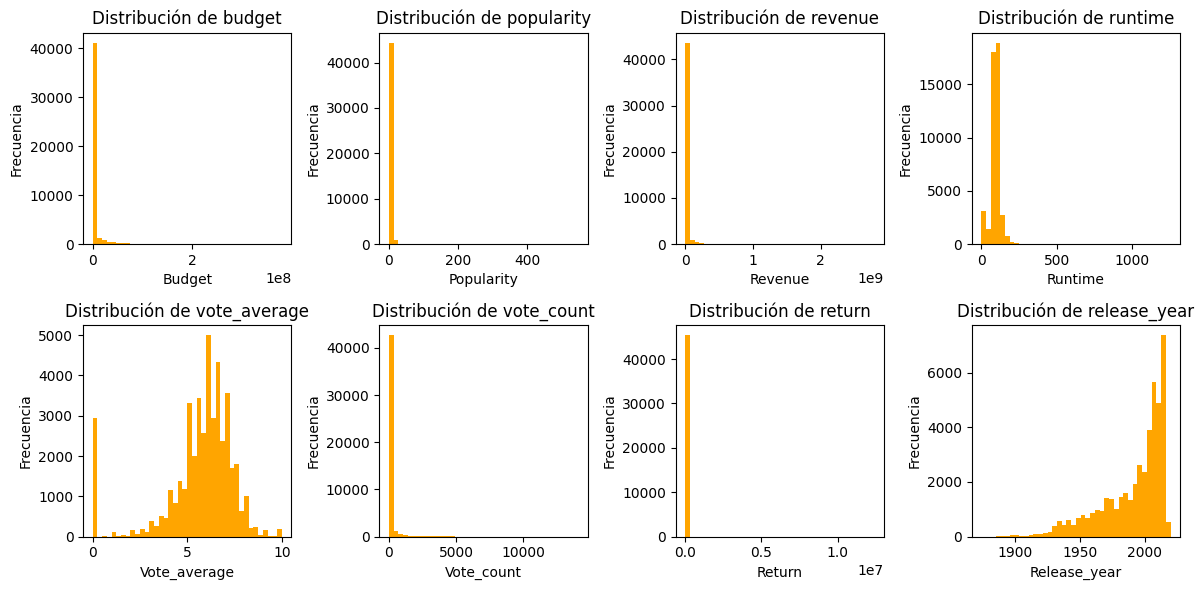

In [ ]:
# Crear un subplot para cada columna
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Iterar sobre las columnas y generar los histogramas
for i, column in enumerate(numeric_columns):
    row = i // 4
    col = i % 4
    ax = axes[row][col]
    ax.hist(df[column], bins=40, color='orange')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Distribución de {column}')

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()

### Boxplots

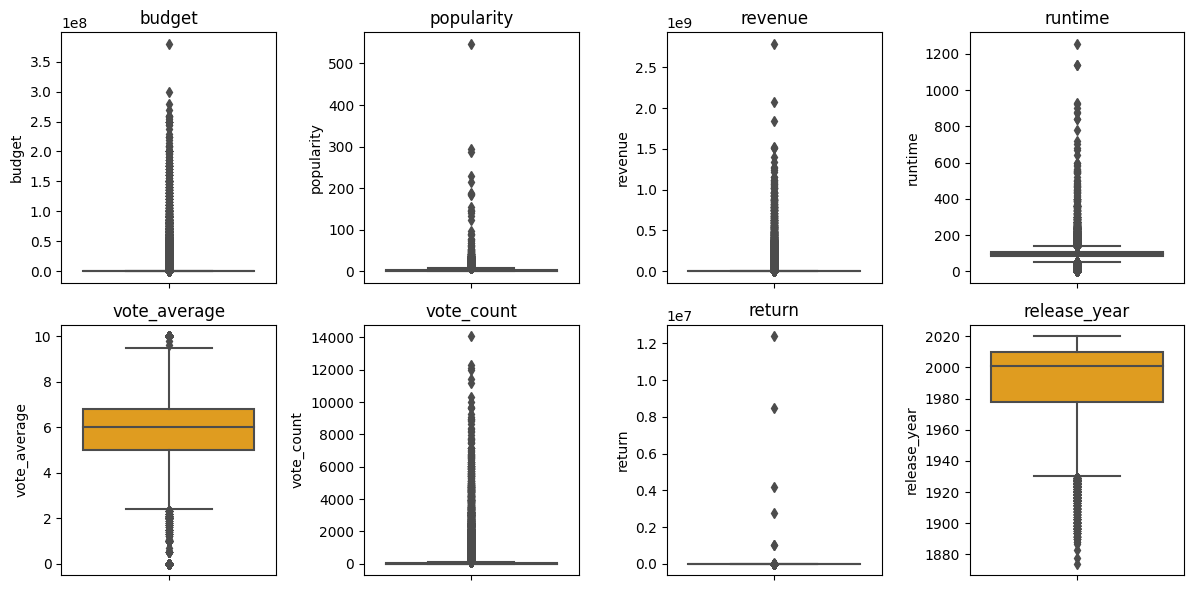

In [ ]:
# Crear un subplot para cada columna
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Iterar sobre las columnas y generar los diagramas de caja
for i, column in enumerate(numeric_columns):
    row = i // 4
    col = i % 4
    ax = axes[row][col]
    sns.boxplot(data=df, y=column, ax=ax, color='orange')
    ax.set_title(column)

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los diagramas de caja
plt.show()

### Gráficos de densidad

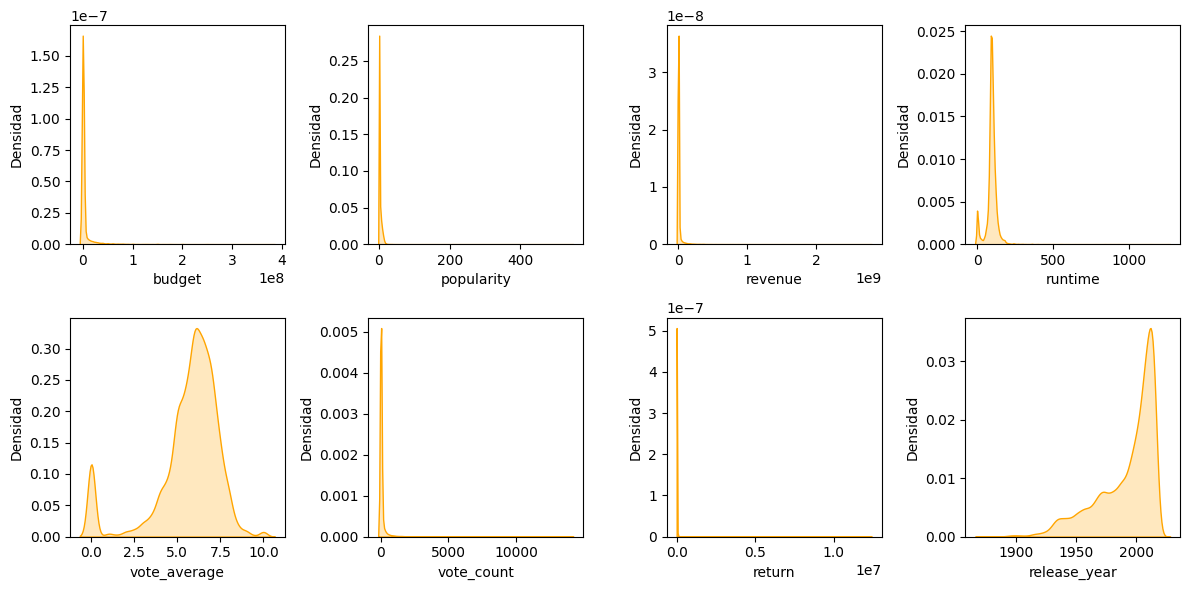

In [ ]:
# Crear un subplot para cada columna
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Iterar sobre las columnas y generar los gráficos de densidad
for i, column in enumerate(numeric_columns):
    row = i // 4
    col = i % 4
    ax = axes[row][col]
    sns.kdeplot(data=df, x=column, ax=ax, fill=True, color='orange')
    ax.set_ylabel('Densidad')#ax.set_title(column)

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los gráficos de densidad
plt.show()

### **Análisis bivariable**

### Gráficos de dispersión

#### ***'budget'*** vs ***'revenue'***: para analizar la relación entre el presupuesto y los ingresos de las películas.

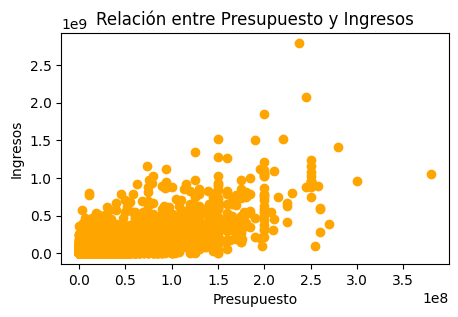

In [ ]:
# Obtener los datos de las columnas 'budget' y 'revenue'
budget = df['budget']
revenue = df['revenue']

# Crear el gráfico de dispersión
plt.figure(figsize=(5, 3))
plt.scatter(budget, revenue, color = 'orange')

# Agregar etiquetas y título al gráfico
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.title('Relación entre Presupuesto y Ingresos')

# Mostrar el gráfico
plt.show()

#### ***'popularity'*** vs ***'vote_count'***: para explorar la relación entre la popularidad de una película y el número de votos recibidos.

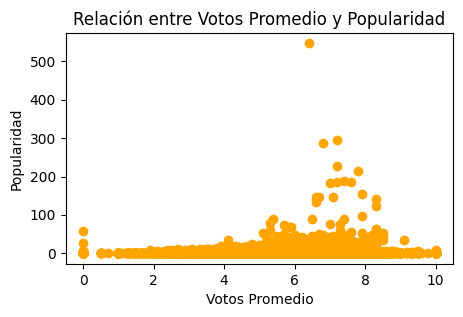

In [ ]:
# Obtener los datos de las columnas 'vote_average' y 'popularity'
vote_average = df['vote_average']
popularity = df['popularity']

# Crear el gráfico de dispersión
plt.figure(figsize=(5, 3))
plt.scatter(vote_average, popularity, color = 'orange')

# Agregar etiquetas y título al gráfico
plt.xlabel('Votos Promedio')
plt.ylabel('Popularidad')
plt.title('Relación entre Votos Promedio y Popularidad')

# Mostrar el gráfico
plt.show()

### **Matriz de correlación**

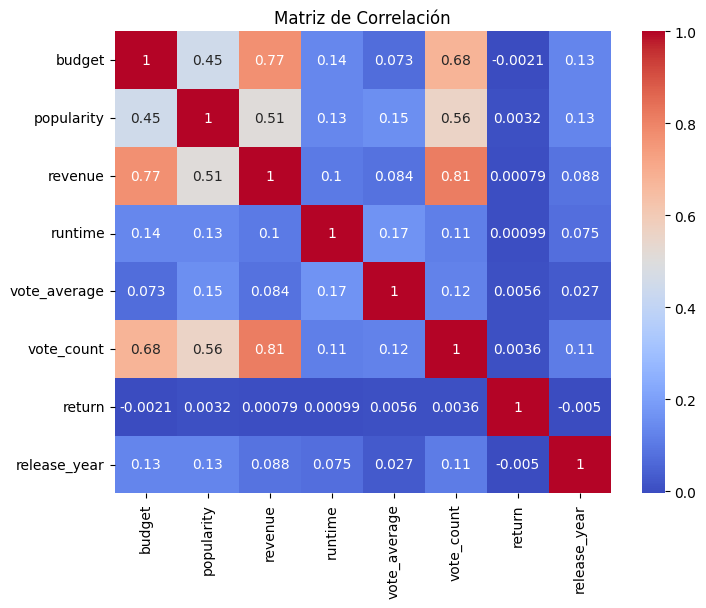

In [ ]:
# Crear una subselección del DataFrame con las columnas numéricas
numeric_df = df[numeric_columns]

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## **Variables de tipo texto**

### **Wordclouds**

### Columnas ***'title'*** y ***'overview'***

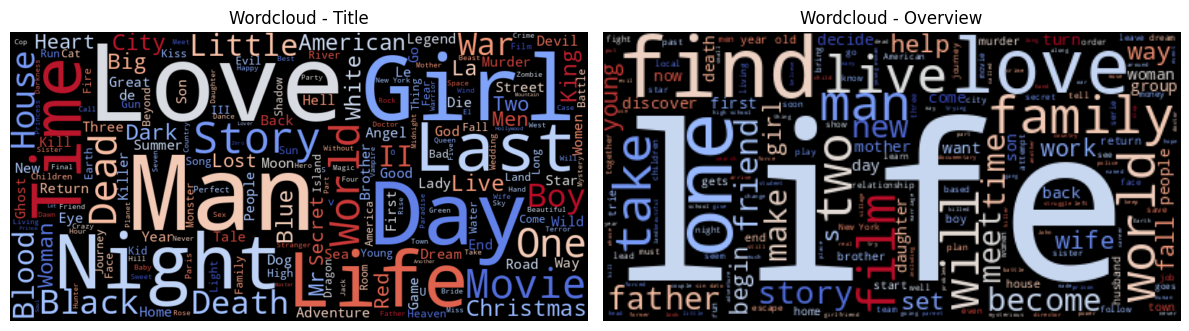

In [ ]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')
title = ' '.join(df['title'])
overview = ' '.join(df['overview'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Wordcloud para 'title'
wordcloud_title = WordCloud(width=800, height=400, max_font_size=150, colormap='coolwarm').generate(title)
axes[0].imshow(wordcloud_title, interpolation='bilinear')
axes[0].set_title('Wordcloud - Title')
axes[0].axis('off')

# Wordcloud para 'overview'
wordcloud_overview = WordCloud(width=400, height=200, max_font_size=150, colormap='coolwarm').generate(overview)
axes[1].imshow(wordcloud_overview, interpolation='bilinear')
axes[1].set_title('Wordcloud - Overview')
axes[1].axis('off')

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

### Columna ***'genre'***

In [ ]:
list_columns = ['genres', 'cast']
df[list_columns] = df[list_columns].applymap(lambda x: list(ast.literal_eval(x)))

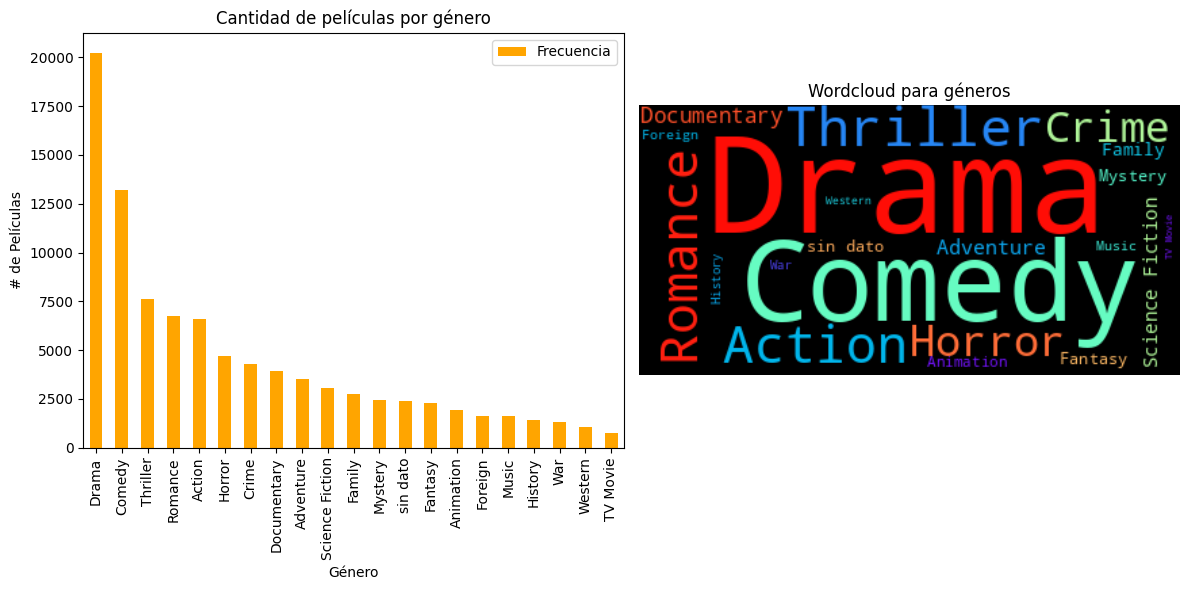

In [ ]:
# Obtener la frecuencia de géneros
genre_counts = Counter([genre for genres in df['genres'] for genre in genres])

# Crear subplots para los gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras
ax1 = axes[0]
genres_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Frecuencia'])
genres_df = genres_df.sort_values('Frecuencia', ascending=False)
genres_df.plot(kind='bar', color='orange', ax=ax1)
ax1.set_xlabel('Género')
ax1.set_ylabel('# de Películas')
ax1.set_title('Cantidad de películas por género')

# Wordcloud
ax2 = axes[1]
wordcloud = WordCloud(colormap='rainbow').generate_from_frequencies(genre_counts)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Wordcloud para géneros')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

### Columna ***'cast'***

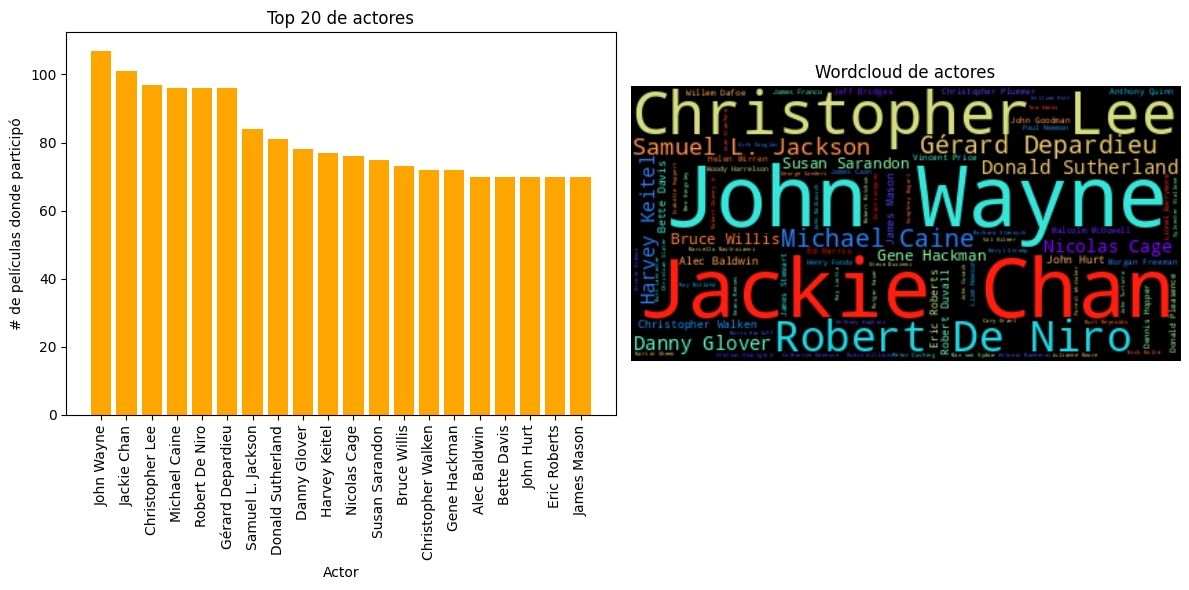

In [ ]:
# Obtener la frecuencia de los actores incluyendo "sin dato"
cast_counts = Counter([actor for actors in df['cast'] for actor in actors])

# Calcular el porcentaje de películas sin datos de actores
total_movies = len(df)
movies_without_cast = cast_counts['sin dato']
percentage_without_cast = (movies_without_cast / total_movies) * 100

# Crear la Wordcloud sin incluir "sin dato"
cast_counts_no_na = {actor: count for actor, count in cast_counts.items() if actor != 'sin dato'}
wordcloud_cast = WordCloud(colormap='rainbow').generate_from_frequencies(cast_counts_no_na)

# Crear subplots para los gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras de frecuencia de actores (sin incluir "sin dato")
cast_df = pd.DataFrame.from_dict(cast_counts_no_na, orient='index', columns=['Frecuencia'])
cast_df = cast_df.sort_values('Frecuencia', ascending=False)
top_20_cast = cast_df[:20]

axes[0].bar(top_20_cast.index, top_20_cast['Frecuencia'], color='orange')
axes[0].set_xlabel('Actor')
axes[0].set_ylabel('# de películas donde participó')
axes[0].set_title('Top 20 de actores')

# Ajustar la rotación de las etiquetas en el eje x
axes[0].tick_params(axis='x', rotation=90)

# Wordcloud del elenco
axes[1].imshow(wordcloud_cast, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Wordcloud de actores')

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

In [ ]:
# Mostrar el porcentaje de películas sin datos de actores en un subplot adicional
print(f'Porcentaje de películas sin datos de actores: {percentage_without_cast:.2f}%')

Porcentaje de películas sin datos de actores: 5.18%


### Columna ***'director'***

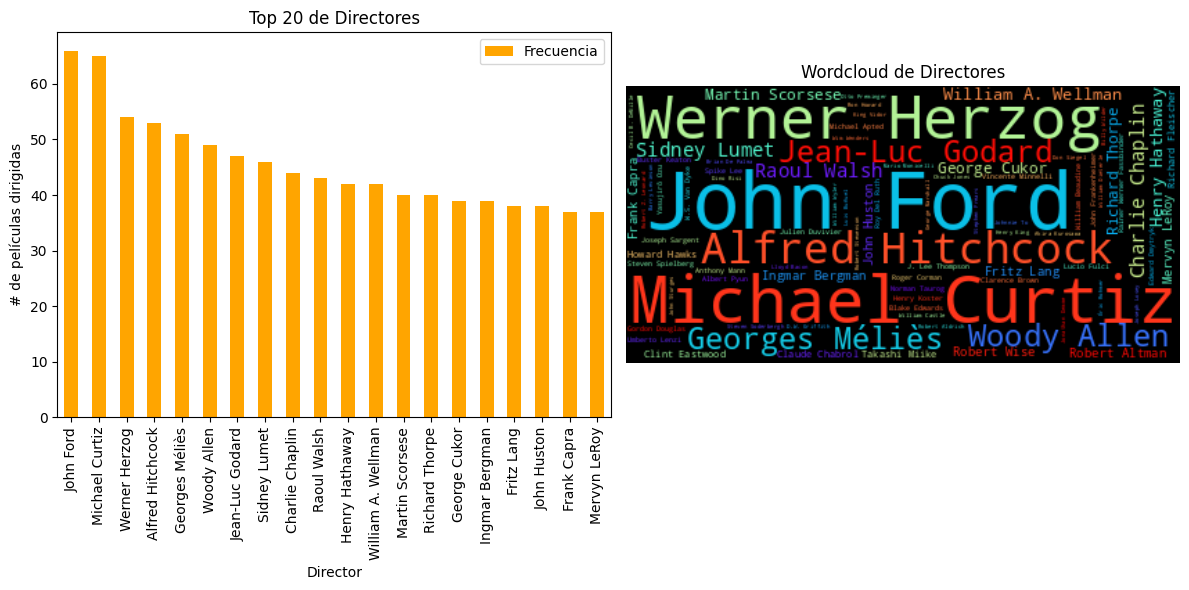

In [ ]:
# Obtener la frecuencia de directores excluyendo "sin dato"
director_counts = Counter(df['director'])
#director_counts.pop('sin dato', None)
movies_without_director = director_counts.pop('sin dato', 0)

# Calcular el porcentaje de películas sin datos de directores
total_movies = len(df)
percentage_without_director = (movies_without_director / total_movies) * 100

# Crear la wordcloud
wordcloud = WordCloud(colormap='rainbow').generate_from_frequencies(director_counts)

# Crear el gráfico de barras
directors_df = pd.DataFrame.from_dict(director_counts, orient='index', columns=['Frecuencia'])
directors_df = directors_df.sort_values('Frecuencia', ascending=False).head(20)

# Crear los subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Gráfico de barras de directores
directors_df.plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_xlabel('Director')
axes[0].set_ylabel('# de películas dirigidas')
axes[0].set_title('Top 20 de Directores')

# Wordcloud de directore
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Wordcloud de Directores')

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
# Mostrar el porcentaje de películas sin datos de actores en un subplot adicional
print(f'Porcentaje de películas sin datos de director: {percentage_without_director:.2f}%')

Porcentaje de películas sin datos de director: 1.84%


### **Películas que pertenecen o no a una colección**

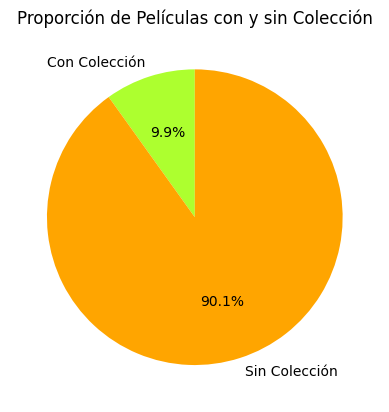

In [ ]:
# Calcular la cantidad de películas con y sin colección
con_coleccion = df[df['id_collection'] != 0].shape[0]
sin_coleccion = df[df['id_collection'] == 0].shape[0]

# Crear la figura y los ejes del gráfico de barras horizontales
fig, ax = plt.subplots()

# Definir los datos y las etiquetas para el gráfico de torta
datos = [con_coleccion, sin_coleccion]
etiquetas = ['Con Colección', 'Sin Colección']

# Definir los colores para cada sección del gráfico
colores = ['greenyellow', 'orange']

# Crear el gráfico de torta
plt.pie(datos, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# Agregar título al gráfico
plt.title('Proporción de Películas con y sin Colección')

# Mostrar el gráfico
plt.show()

### **Cantidad de películas estrenadas por año**

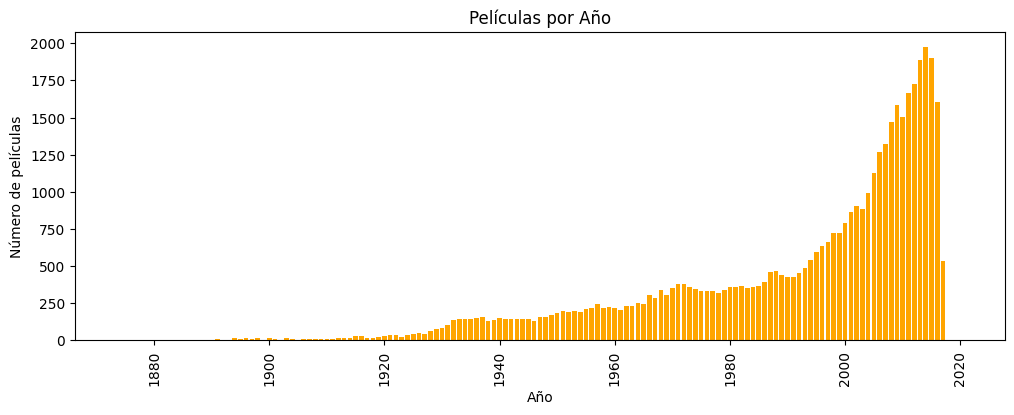

In [ ]:
import matplotlib.pyplot as plt

# Obtener el número de películas por año
peliculas_por_anio = df['release_year'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 4))
plt.bar(peliculas_por_anio.index, peliculas_por_anio.values, color='orange')
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.title('Películas por Año')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

### **Cantidad de películas estrenadas por mes y día de la semana**

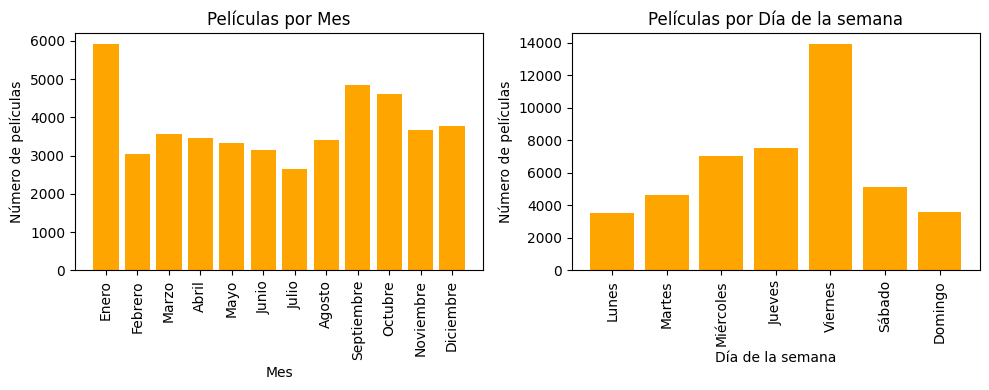

In [ ]:
import matplotlib.pyplot as plt

# Obtener el número de películas por mes
df['release_month'] = pd.to_datetime(df['release_date']).dt.month
peliculas_por_mes = df['release_month'].value_counts().sort_index()

# Obtener el número de películas por día de la semana
df['release_day'] = pd.to_datetime(df['release_date']).dt.dayofweek
peliculas_por_dia = df['release_day'].value_counts().sort_index()

# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Gráfico de películas por mes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ax1 = axes[0]
ax1.bar(meses, peliculas_por_mes.values, color='orange')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Número de películas')
ax1.set_title('Películas por Mes')
ax1.set_xticklabels(meses, rotation='vertical')

# Gráfico de películas por día de la semana
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ax2 = axes[1]
ax2.bar(dias, peliculas_por_dia.values, color='orange')
ax2.set_xlabel('Día de la semana')
ax2.set_ylabel('Número de películas')
ax2.set_title('Películas por Día de la semana')
ax2.set_xticklabels(dias, rotation='vertical')

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()